## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

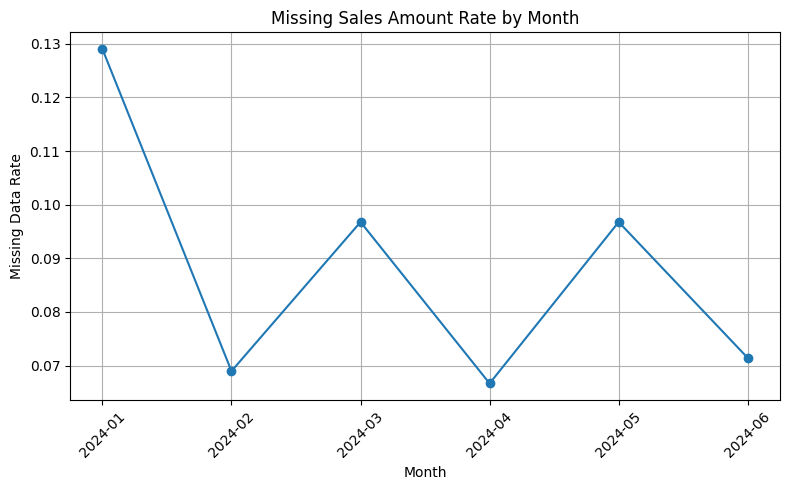

In [1]:
# Write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data simulating sales_data with a 'date' and some missing values in 'sales_amount'
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=180)  # 6 months daily data
data = {
    'date': dates,
    'sales_amount': np.random.choice([100, 200, 300, None], size=180, p=[0.3, 0.3, 0.3, 0.1])
}
df = pd.DataFrame(data)

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Extract month-year from date for grouping
df['month'] = df['date'].dt.to_period('M')

# Calculate missing data rate per month for 'sales_amount'
missing_rate = df.groupby('month')['sales_amount'].apply(lambda x: x.isna().mean()).reset_index()
missing_rate.columns = ['month', 'missing_rate']

# Plotting missing data rate over months
plt.figure(figsize=(8,5))
plt.plot(missing_rate['month'].astype(str), missing_rate['missing_rate'], marker='o')
plt.title('Missing Sales Amount Rate by Month')
plt.xlabel('Month')
plt.ylabel('Missing Data Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
